<h1 style="text-align:center">Step Response of a Mass-Spring-Damper System</h1>
<h3 style="text-align:center"> MCHE 485: Mechanical Vibrations</h3>
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpringDamper_Seismic_Horiz.png" alt="A Mass-Spring-Damper System" width=50%/></a><br>
    <strong> Figure 1: A Mass-Spring-Damper System </strong>
</p>

This notebook simluates a step response of a simple mass-spring-damper system like the one shown in Figure 1. We will also be using some functions from the [Python Control Systems Toolbox](https://www.cds.caltech.edu/~murray/wiki/Control_Systems_Library_for_Python).

The equation of motion for the system is:

$ \quad m \ddot{x} + c \dot{x} + kx = c \dot{y} + ky $

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency, $\omega_n$.

$ \quad \ddot{x} + 2\zeta\omega_n\dot{x} + \omega_n^2x = 2\zeta\omega_n \dot{y} + \omega_n^2 y$

For information on how to obtain this equation, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

We'll start by using the solution to the differential equation that we developed in class to plot the response. The solution for the underdamped case is:

$ \quad x(t) = c + e^{-\zeta\omega_nt}\left(-c \cos{\omega_d t} - \frac{\zeta c}{\sqrt{1-\zeta^2}} \sin{\omega_d t}\right) $

where $c$ is the desired step size, and $\omega_d = \omega_n \sqrt{1 - \zeta^2}$ is the damped natural frequency.

In [1]:
import numpy as np              # Grab all of the NumPy functions with nickname np

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline

import matplotlib.pyplot as plt

In [3]:
# Define the System Parameters
m = 1.0                 # kg
k = (2.0*np.pi)**2      # N/m (Selected to give an undamped natrual frequency of 1Hz)
wn = np.sqrt(k/m)       # Natural Frequency (rad/s)

z = 0.25                # Define a desired damping ratio
c = 2*z*wn*m            # calculate the damping coeff. to create it (N/(m/s))

wd = wn*np.sqrt(1-z**2) # Damped natural frequency (rad/s)

In [4]:
# Define the time array
t = np.linspace(0, 3, 301) # 0-3s with 301 points in between

# Define the step input (We're using y_step, because we've already defined c as our damping coeff.)
y_step = 1.0

# Define x(t)
# In this case, we're specifying that the step input occurs at t = 0
x = y_step + np.exp(-z*wn*t)*(-y_step*np.cos(wd*t) + (z*y_step)/(np.sqrt(1-z**2)) * np.sin(wd*t))

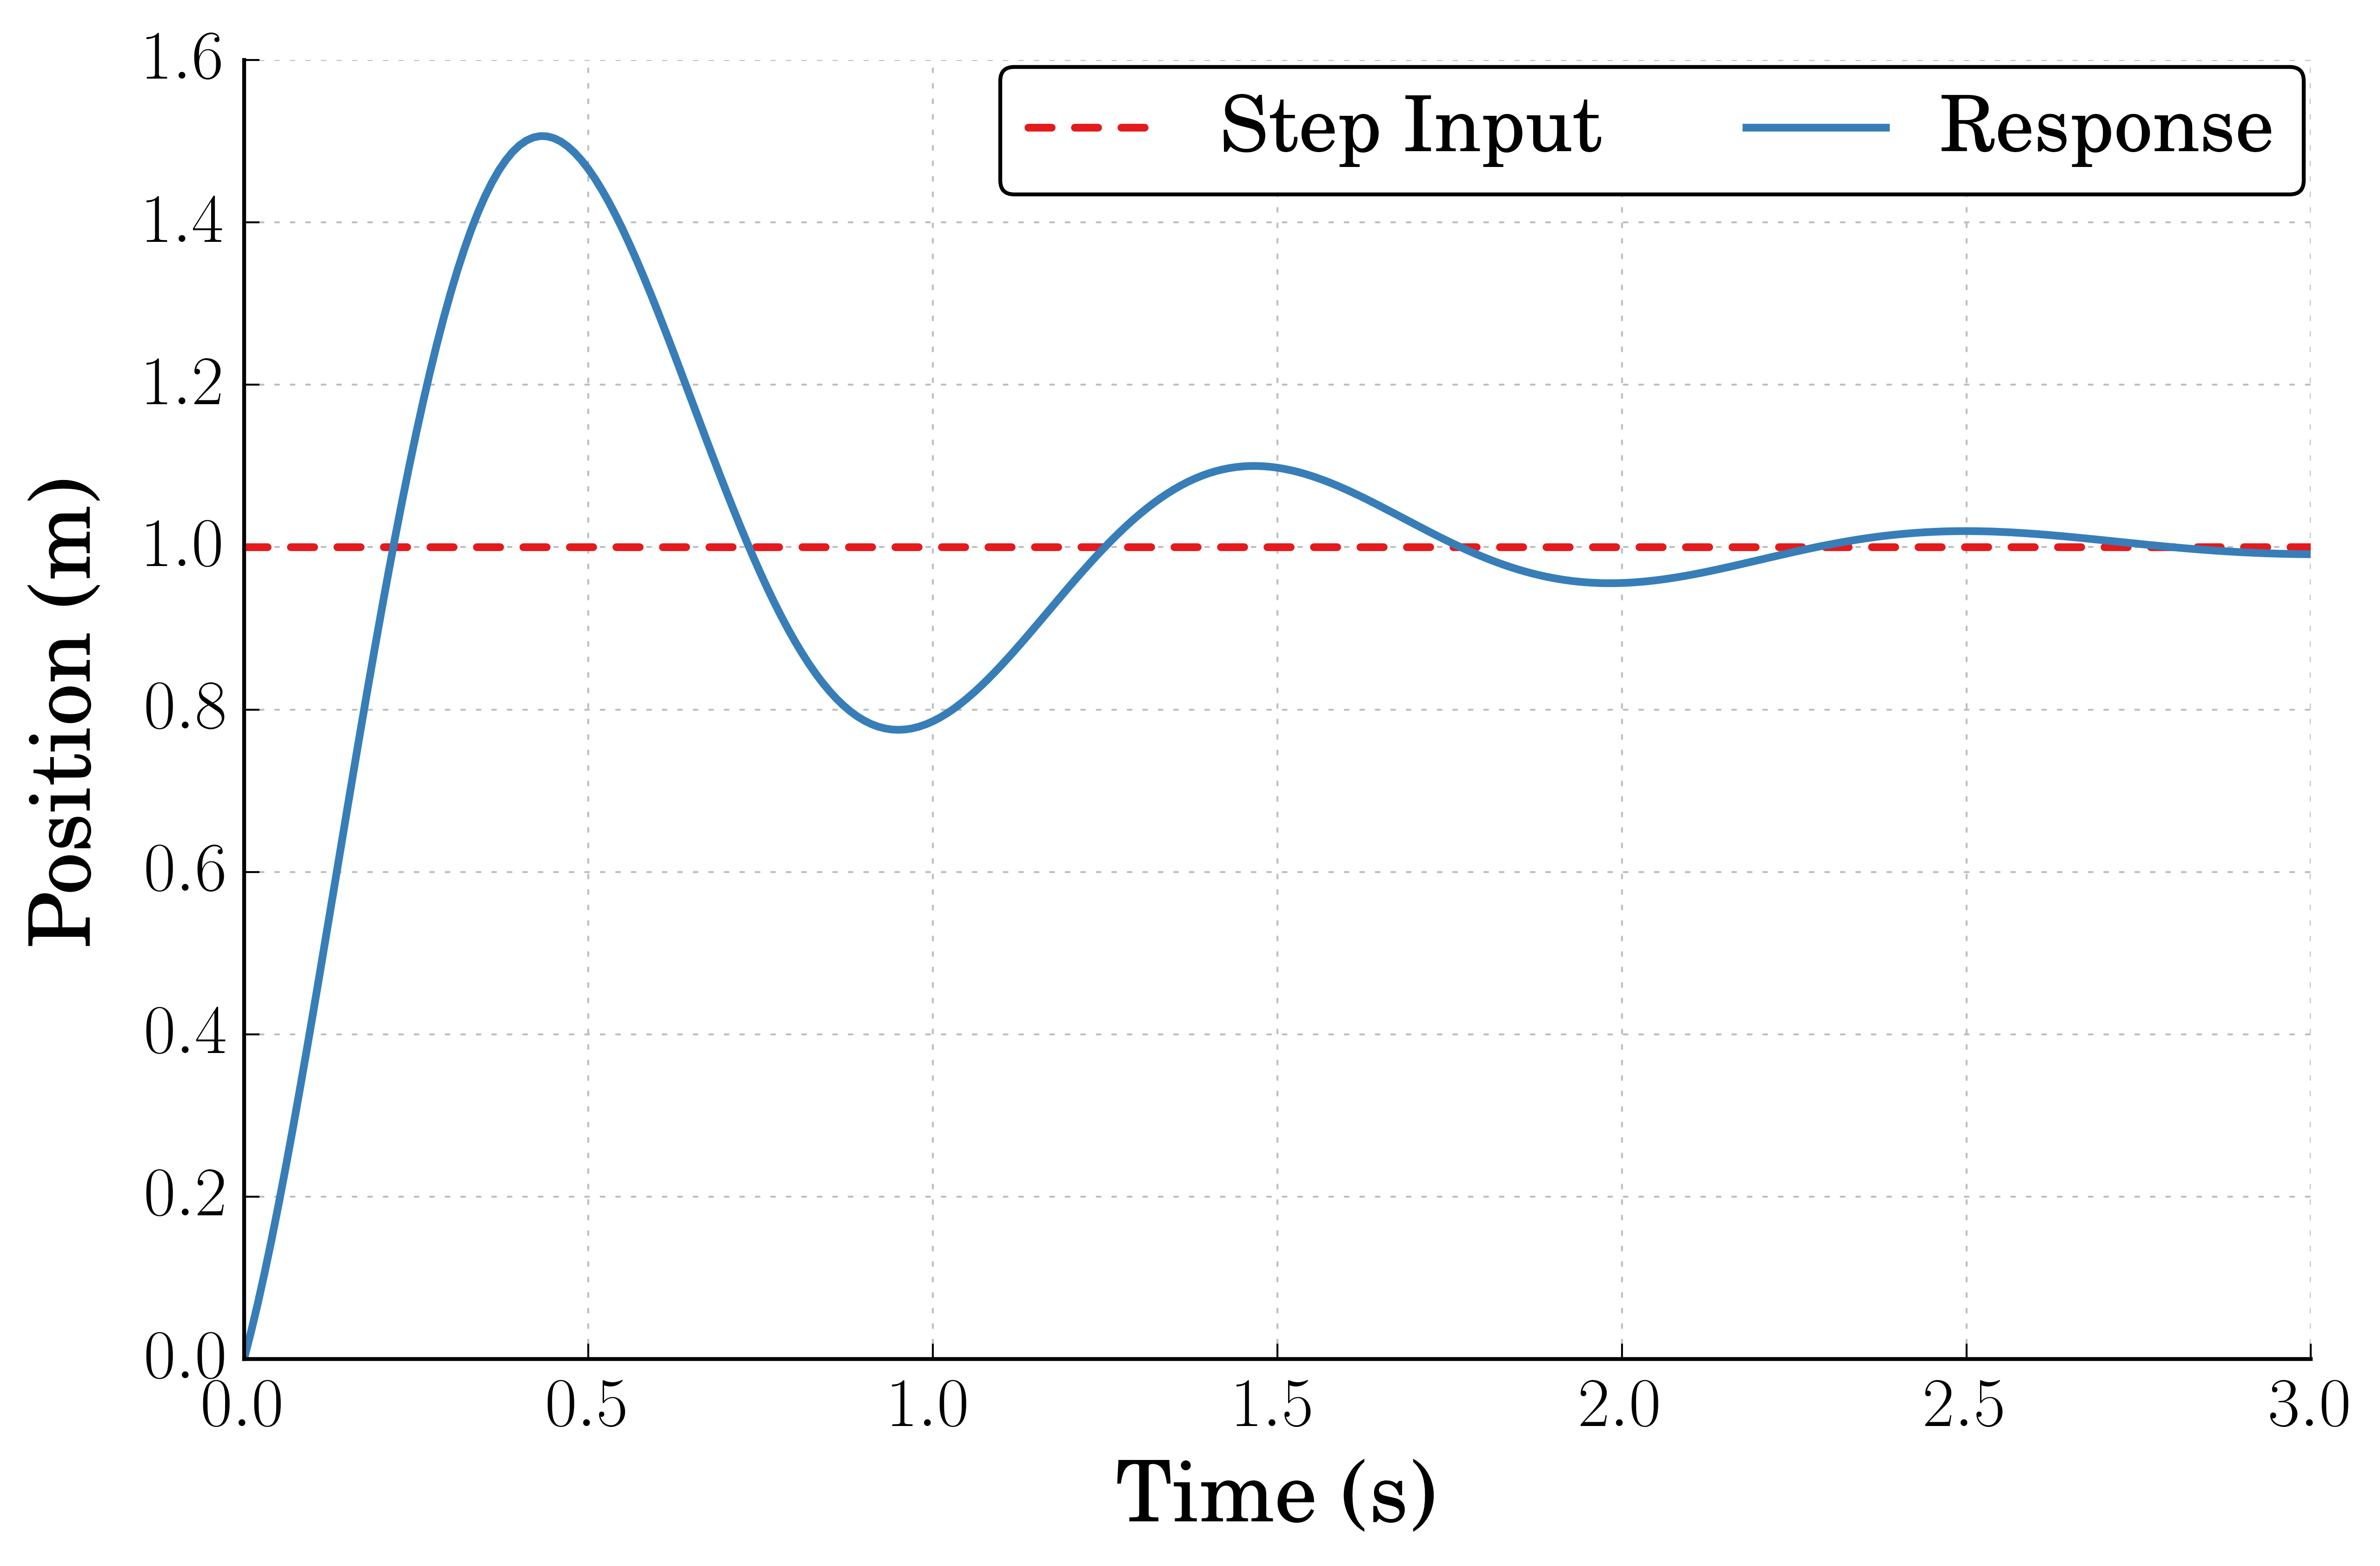

In [5]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position (m)', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot([t[0], t[-1]], [y_step, y_step], linewidth=2, linestyle='--', label=r'Step Input')
plt.plot(t, x, linewidth=2, linestyle='-', label=r'Response')

# uncomment below and set limits if needed
# plt.xlim(0, 5)
# plt.ylim(0, 10)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncommetn to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('plot_filename.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

### Using the Control System Toolbox
We can also simluate responses using the [Python Control Systems Library](http://www.cds.caltech.edu/~murray/wiki/Control_Systems_Library_for_Python). To do so, we'll use the transfer function form of the equations of motion. If you've had controls, you probably spent a lot of time working with transfer functions. If not, we'll learn more about them later. For now, just think of a transfer function as an experssion of how the input is "transferred" to the output.

In [6]:
# import the control system toolbox
import control

In [7]:
# Define the system to use in simulation - in transfer function form here
num = [2.0*z*wn, wn**2]
den = [1.0, 2.0*z*wn, wn**2]

sys = control.tf(num,den)

In [8]:
# Form the step input in desired position, yd, starting the step at t=0.0s
yd = np.ones_like(t)              # This is an array of all ones, with the same size as t

In [9]:
# Define the initial conditions x_dot(0) = 0, x(0) = 0
x0 = [0.,0.]

# run the simulation - utilize the built-in initial condition response function
[T, yout, x_out] = control.forced_response(sys, t, yd, x0)

Now, let's plot this version of the solution. It should look the same as the function-based version.

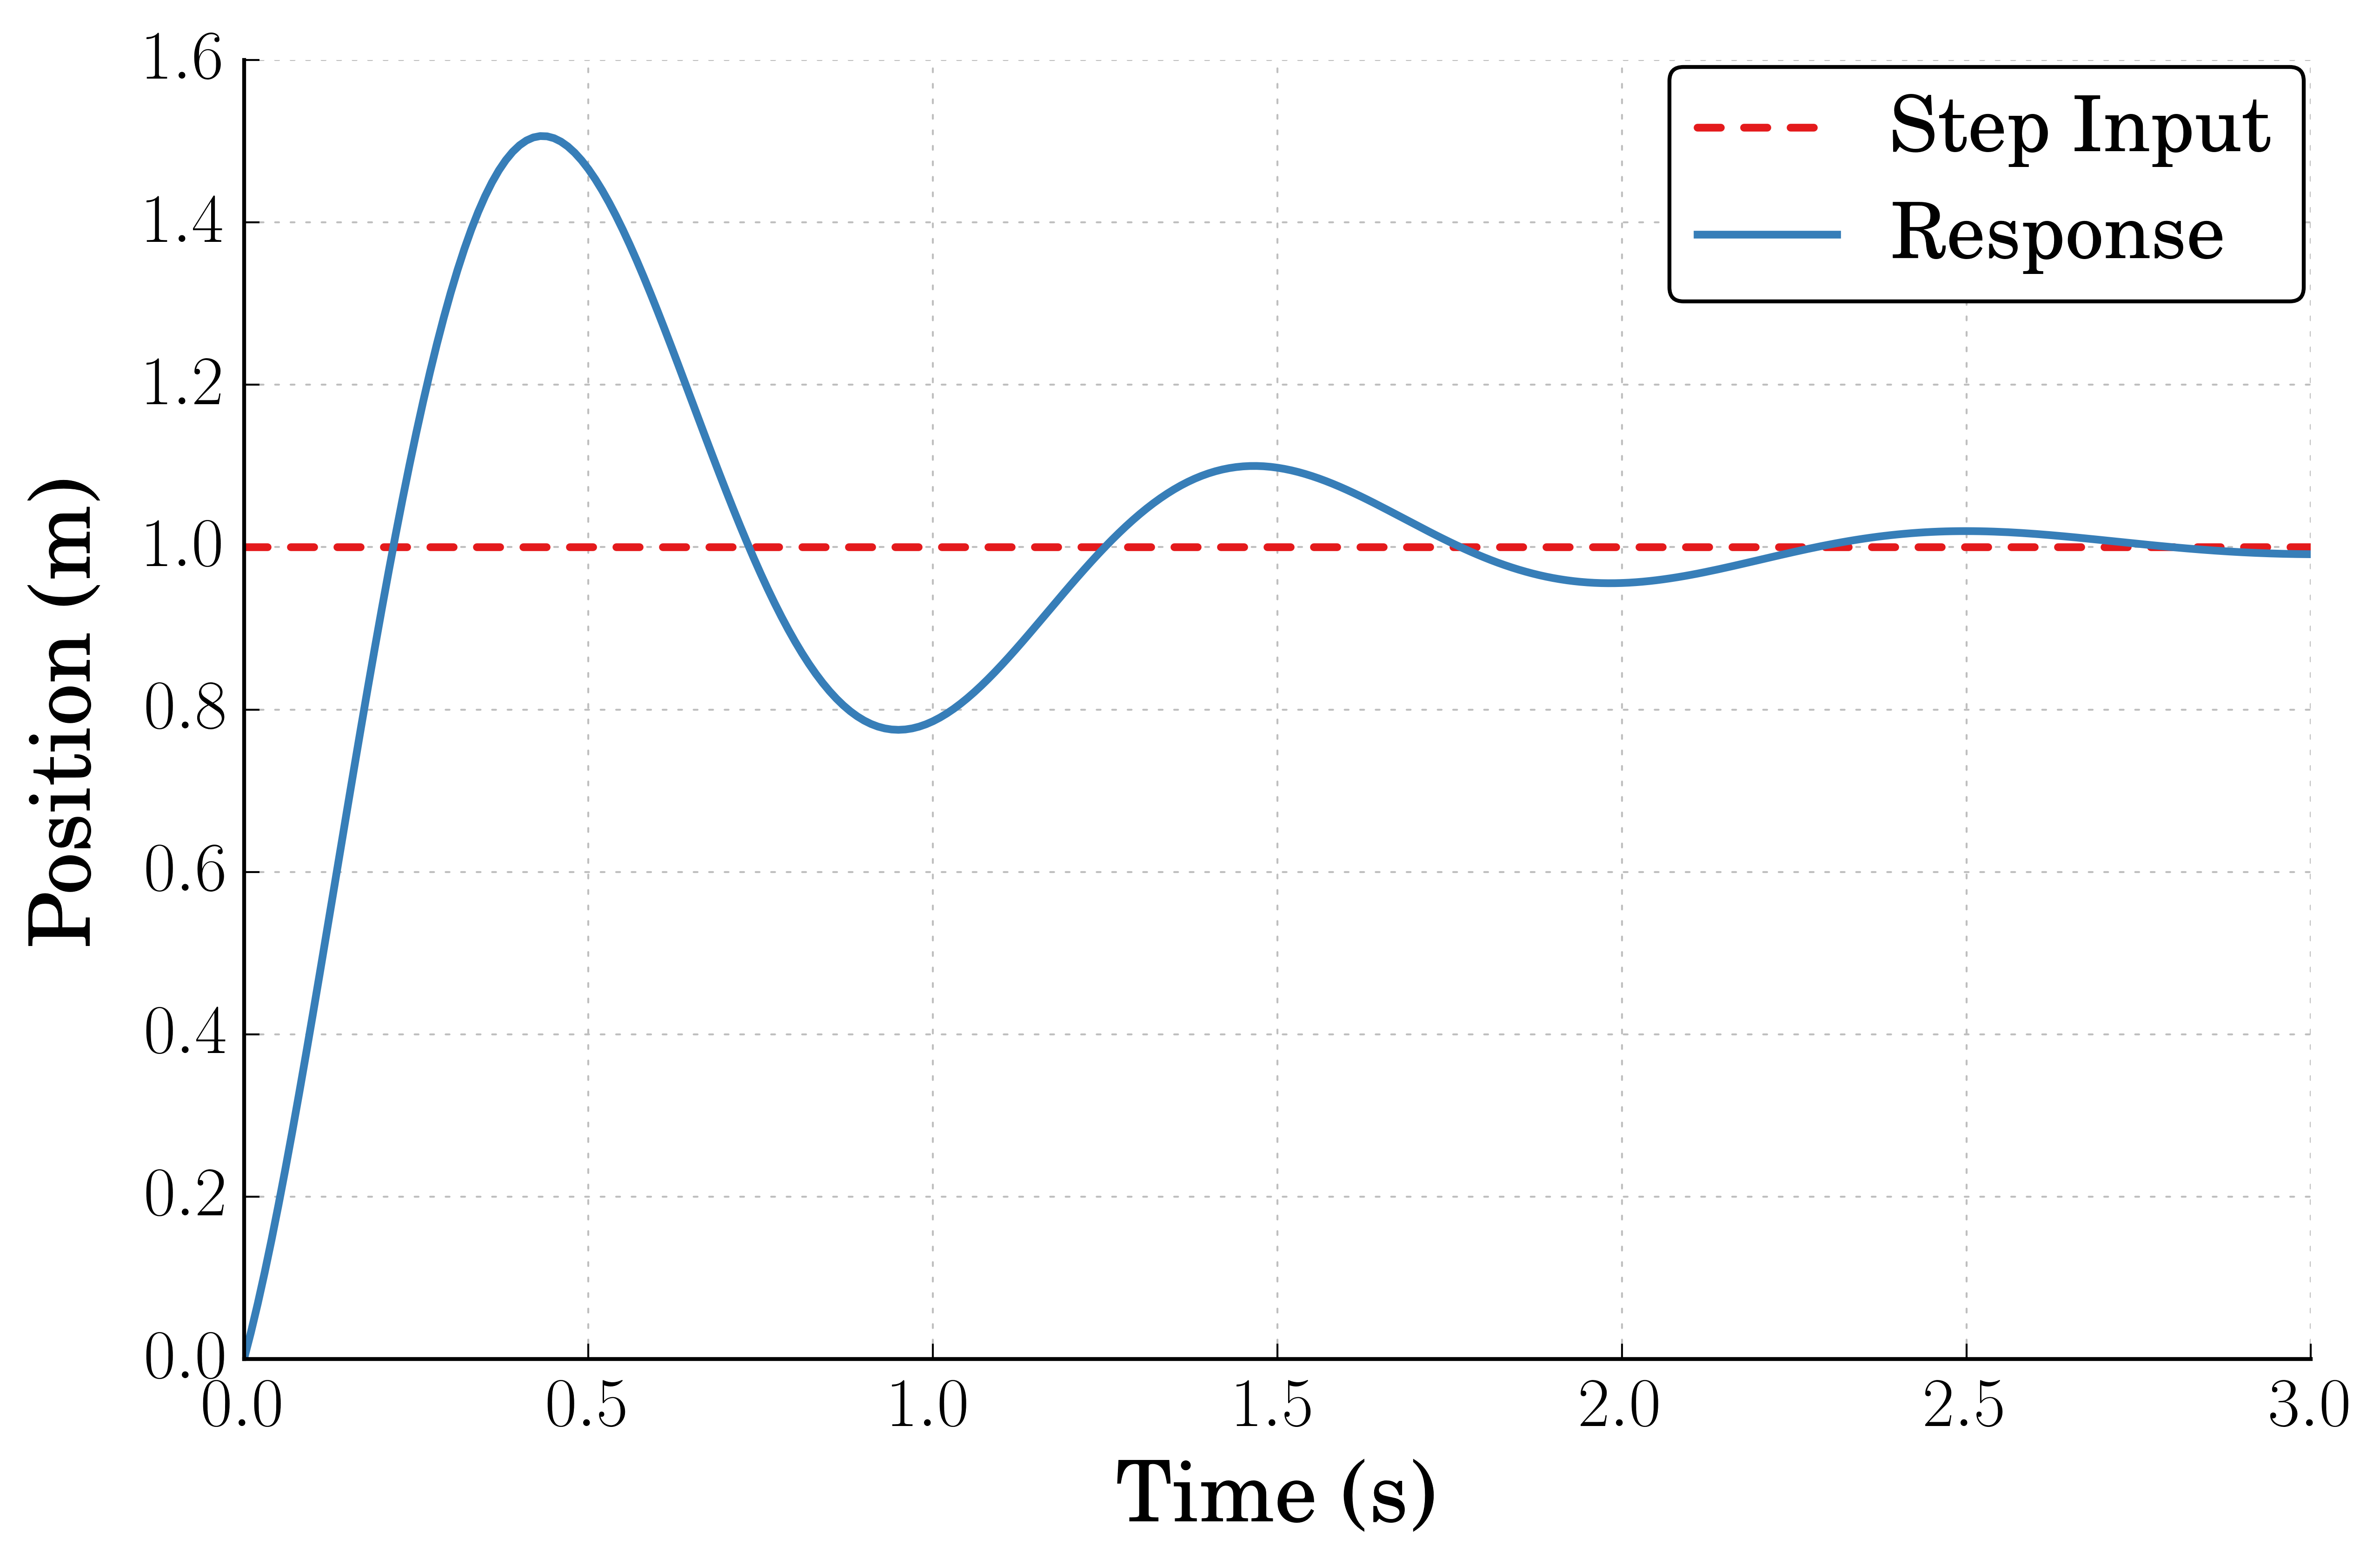

In [10]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position (m)', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, yd, linewidth=2, linestyle='--', label=r'Step Input')
plt.plot(t, yout, linewidth=2, linestyle='-', label=r'Response')

# uncomment below and set limits if needed
# plt.xlim(0, 5)
# plt.ylim(0, 10)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncommetn to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('plot_filename.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

<hr class = "style-end">
#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [11]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(open(css_file, "r").read())